In [40]:
import h5py
import numba
import numpy as np
import pandas as pd
import scipy.integrate
import matplotlib as mpl
import matplotlib.pyplot as plt
from hoki.utils.exceptions import HokiFormatError
from pylab import cm
import pandas as pd

In [43]:
data = h5py.File(f"/Users/dillon/Desktop/data.h5", "r")
event_rates = data['event_rates']
observations = data['observations']

In [44]:
h = event_rates.attrs['h']
omega_M = event_rates.attrs['omega_M']
omega_L = event_rates.attrs['omega_L']

In [9]:
file_path = '/Users/dillon/Desktop/Rates.xlsx' 

In [12]:
Ia_sheet = 'Ia'
CCSN_sheet = 'CCSN'
LGRB_sheet = 'LGRB'
PISN_sheet = 'PISN'

BBH_sheet = 'BBH'
BNS_sheet = 'BNS'
BHNS_sheet = 'BHNS'

In [15]:
df_Ia = pd.read_excel(file_path, sheet_name=Ia_sheet)
df_CCSN = pd.read_excel(file_path, sheet_name=CCSN_sheet)
df_LGRB = pd.read_excel(file_path, sheet_name=LGRB_sheet)
df_PISN = pd.read_excel(file_path, sheet_name=PISN_sheet)

df_BBH = pd.read_excel(file_path, sheet_name=BBH_sheet)
df_BNS = pd.read_excel(file_path, sheet_name=BNS_sheet)
df_BHNS = pd.read_excel(file_path, sheet_name=BHNS_sheet)

In [49]:
obs_Ia = observations['Ia']
obs_CCSN = observations['CCSN']
obs_LGRB = observations['LGRB']
obs_PISN = observations['PISN']

obs_BBH = observations['BBH']
obs_BNS = observations['BNS']
obs_BHNS = observations['BHNS']

### Ia

Text(0, 0.5, 'Event Rate Density [yr$^{-1}$ Gpc$^{-3}]$')

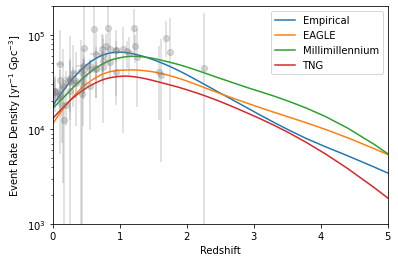

In [50]:
redshift = df_Ia['REDSHIFT']
EMP_Ia = df_Ia['EMP']
EAGLE_Ia = df_Ia['EAGLE']
MILLI_Ia = df_Ia['MILLI']
TNG_Ia = df_Ia['TNG']

plt.plot(redshift, EMP_Ia, label = 'Empirical')
plt.plot(redshift, EAGLE_Ia, label = 'EAGLE')
plt.plot(redshift, MILLI_Ia, label = 'Millimillennium')
plt.plot(redshift, TNG_Ia, label = 'TNG')
plt.errorbar(np.array(obs_Ia['mean_z']),
            np.array(obs_Ia['rate'])*h**3, 
            xerr=[obs_Ia['lower_z'],obs_Ia['upper_z']],
            yerr=[obs_Ia['lower_rate']*h**3, obs_Ia['upper_rate']*h**3],
            fmt="o",
            ms=6,
            alpha=0.3,
            color="grey")


plt.yscale('log')
plt.ylim(1e3, 2e5)
plt.xlim(0,5)
plt.legend()
plt.xlabel('Redshift')
plt.ylabel(r"Event Rate Density [yr$^{-1}$ Gpc$^{-3}]$")


### CCSN

Text(0, 0.5, 'Event Rate Density [yr$^{-1}$ Gpc$^{-3}]$')

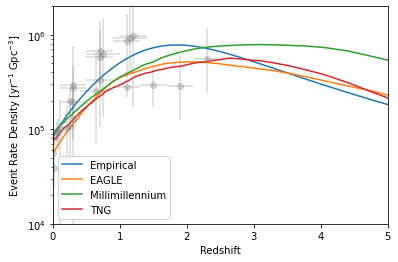

In [51]:
redshift = df_CCSN['REDSHIFT']
EMP_CCSN = df_CCSN['EMP']
EAGLE_CCSN = df_CCSN['EAGLE']
MILLI_CCSN = df_CCSN['MILLI']
TNG_CCSN = df_CCSN['TNG']

plt.plot(redshift, EMP_CCSN, label = 'Empirical')
plt.plot(redshift, EAGLE_CCSN, label = 'EAGLE')
plt.plot(redshift, MILLI_CCSN, label = 'Millimillennium')
plt.plot(redshift, TNG_CCSN, label = 'TNG')
plt.errorbar(np.array(obs_CCSN['mean_z']),
            np.array(obs_CCSN['rate'])*h**3, 
            xerr=[obs_CCSN['lower_z'],obs_CCSN['upper_z']],
            yerr=[obs_CCSN['lower_rate']*h**3, obs_CCSN['upper_rate']*h**3],
            fmt="o",
            ms=6,
            alpha=0.3,
            color="grey")

plt.yscale('log')
plt.ylim(1e4, 2e6)
plt.xlim(0,5)
plt.legend()
plt.xlabel('Redshift')
plt.ylabel(r"Event Rate Density [yr$^{-1}$ Gpc$^{-3}]$")


### LGRB

Text(0, 0.5, 'Event Rate Density [yr$^{-1}$ Gpc$^{-3}]$')

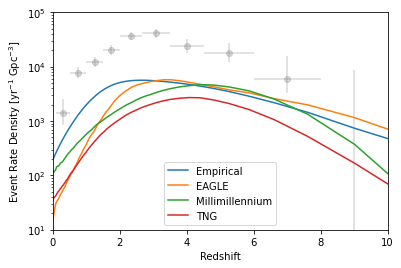

In [52]:
redshift = df_LGRB['REDSHIFT']
EMP_LGRB = df_LGRB['EMP']
EAGLE_LGRB = df_LGRB['EAGLE']
MILLI_LGRB = df_LGRB['MILLI']
TNG_LGRB = df_LGRB['TNG']

plt.plot(redshift, EMP_LGRB, label = 'Empirical')
plt.plot(redshift, EAGLE_LGRB, label = 'EAGLE')
plt.plot(redshift, MILLI_LGRB, label = 'Millimillennium')
plt.plot(redshift, TNG_LGRB, label = 'TNG')
plt.errorbar(np.array(obs_LGRB['mean_z']),
            np.array(obs_LGRB['rate'])*h**3, 
            xerr=[obs_LGRB['lower_z'],obs_LGRB['upper_z']],
            yerr=[obs_LGRB['lower_rate']*h**3, obs_LGRB['upper_rate']*h**3],
            fmt="o",
            ms=6,
            alpha=0.3,
            color="grey")

plt.yscale('log')
plt.ylim(1e1, 1e5)
plt.xlim(0,10)
plt.legend()
plt.xlabel('Redshift')
plt.ylabel(r"Event Rate Density [yr$^{-1}$ Gpc$^{-3}]$")


Note that these rates do not include additional post-processed LGRB tidal pathways. The markers here are the opening angle corrected SHOALS rates (Perley et al. 2016)

### PISN

Text(0, 0.5, 'Event Rate Density [yr$^{-1}$ Gpc$^{-3}]$')

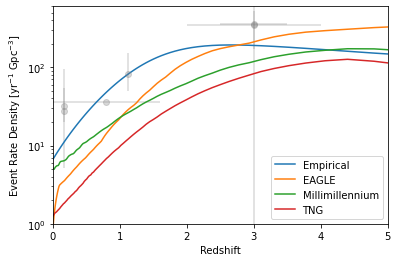

In [53]:
redshift = df_PISN['REDSHIFT']
EMP_PISN = df_PISN['EMP']
EAGLE_PISN = df_PISN['EAGLE']
MILLI_PISN = df_PISN['MILLI']
TNG_PISN = df_PISN['TNG']

plt.plot(redshift, EMP_PISN, label = 'Empirical')
plt.plot(redshift, EAGLE_PISN, label = 'EAGLE')
plt.plot(redshift, MILLI_PISN, label = 'Millimillennium')
plt.plot(redshift, TNG_PISN, label = 'TNG')
plt.errorbar(np.array(obs_PISN['mean_z']),
            np.array(obs_PISN['rate'])*h**3, 
            xerr=[obs_PISN['lower_z'],obs_PISN['upper_z']],
            yerr=[obs_PISN['lower_rate']*h**3, obs_PISN['upper_rate']*h**3],
            fmt="o",
            ms=6,
            alpha=0.3,
            color="grey")

plt.yscale('log')
plt.ylim(1e0, 6e2)
plt.xlim(0,5)
plt.legend()
plt.xlabel('Redshift')
plt.ylabel(r"Event Rate Density [yr$^{-1}$ Gpc$^{-3}]$")


### BBH

Text(0, 0.5, 'Event Rate Density [yr$^{-1}$ Gpc$^{-3}]$')

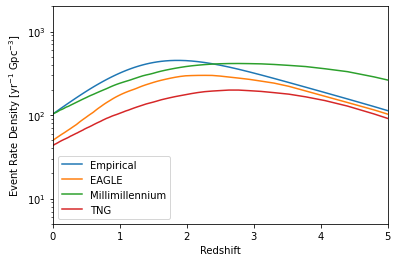

In [34]:
redshift = df_BBH['REDSHIFT']
EMP_BBH = df_BBH['EMP']
EAGLE_BBH = df_BBH['EAGLE']
MILLI_BBH = df_BBH['MILLI']
TNG_BBH = df_BBH['TNG']

plt.plot(redshift, EMP_BBH, label = 'Empirical')
plt.plot(redshift, EAGLE_BBH, label = 'EAGLE')
plt.plot(redshift, MILLI_BBH, label = 'Millimillennium')
plt.plot(redshift, TNG_BBH, label = 'TNG')

plt.yscale('log')
plt.ylim(5e0, 2e3)
plt.xlim(0,5)
plt.legend()
plt.xlabel('Redshift')
plt.ylabel(r"Event Rate Density [yr$^{-1}$ Gpc$^{-3}]$")


### BNS

Text(0, 0.5, 'Event Rate Density [yr$^{-1}$ Gpc$^{-3}]$')

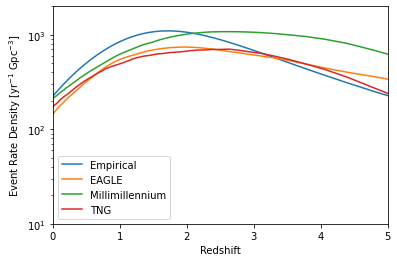

In [37]:
redshift = df_BNS['REDSHIFT']
EMP_BNS = df_BNS['EMP']
EAGLE_BNS = df_BNS['EAGLE']
MILLI_BNS = df_BNS['MILLI']
TNG_BNS = df_BNS['TNG']

plt.plot(redshift, EMP_BNS, label = 'Empirical')
plt.plot(redshift, EAGLE_BNS, label = 'EAGLE')
plt.plot(redshift, MILLI_BNS, label = 'Millimillennium')
plt.plot(redshift, TNG_BNS, label = 'TNG')

plt.yscale('log')
plt.ylim(1e1, 2e3)
plt.xlim(0,5)
plt.legend()
plt.xlabel('Redshift')
plt.ylabel(r"Event Rate Density [yr$^{-1}$ Gpc$^{-3}]$")


### BHNS

Text(0, 0.5, 'Event Rate Density [yr$^{-1}$ Gpc$^{-3}]$')

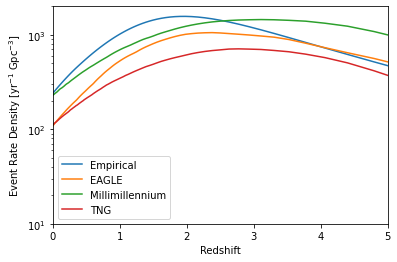

In [38]:
redshift = df_BHNS['REDSHIFT']
EMP_BHNS = df_BHNS['EMP']
EAGLE_BHNS = df_BHNS['EAGLE']
MILLI_BHNS = df_BHNS['MILLI']
TNG_BHNS = df_BHNS['TNG']

plt.plot(redshift, EMP_BHNS, label = 'Empirical')
plt.plot(redshift, EAGLE_BHNS, label = 'EAGLE')
plt.plot(redshift, MILLI_BHNS, label = 'Millimillennium')
plt.plot(redshift, TNG_BHNS, label = 'TNG')

plt.yscale('log')
plt.ylim(1e1, 2e3)
plt.xlim(0,5)
plt.legend()
plt.xlabel('Redshift')
plt.ylabel(r"Event Rate Density [yr$^{-1}$ Gpc$^{-3}]$")
